In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)

merged_df.head()


,geonameid,name_x,asciiname,alternatenames,latitude,longitude,feature class,feature code,iso alpha 2,cc2,...,nearest_cdd_6,nearest_cdd_7,nearest_cdd_8,nearest_cdd_9,nearest_cdd_10,nearest_cdd_11,nearest_cdd_12,cdd_total_year,cdd_average_year,cdd_variance_year
0,292968,Abu Dhabi,Abu Dhabi,"A-pu-that-pi,AEbu Saby,AUH,Aboe Dhabi,Abou Dab...",24.45118,54.39696,P,PPLC,AE,NaN,...,0.000000,1.260132,0.213451,12.751818,26.862827,37.184335,34.214109,138.203800,23.033967,312.313904
1,1138958,Kabul,Kabul,"Cabool,Caboul,Cabul,Cabura,Cabúl,Caubul,KBL,Ka...",34.52813,69.17233,P,PPLC,AF,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.828070,0.971345,5.102520
2,3183875,Tirana,Tirana,"TIA,Terana,Theranda,Tiorana,Tiorána,Tiran,Tira...",41.32750,19.81889,P,PPLC,AL,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,616052,Yerevan,Yerevan,"Ayrivan,Djerevan,EVN,Eireavan,Eireaván,Ereban,...",40.18111,44.51361,P,PPLC,AM,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2240449,Luanda,Luanda,"LAD,Loanda,Louanda,Louanta,Luand,Luanda,Luanda...",-8.83682,13.23432,P,PPLC,AO,NaN,...,60.861317,48.601560,54.109394,49.874621,76.713088,77.228525,49.986176,545.156652,90.859442,630.105748


/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_9578/1242755307.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_9578/1242755307.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


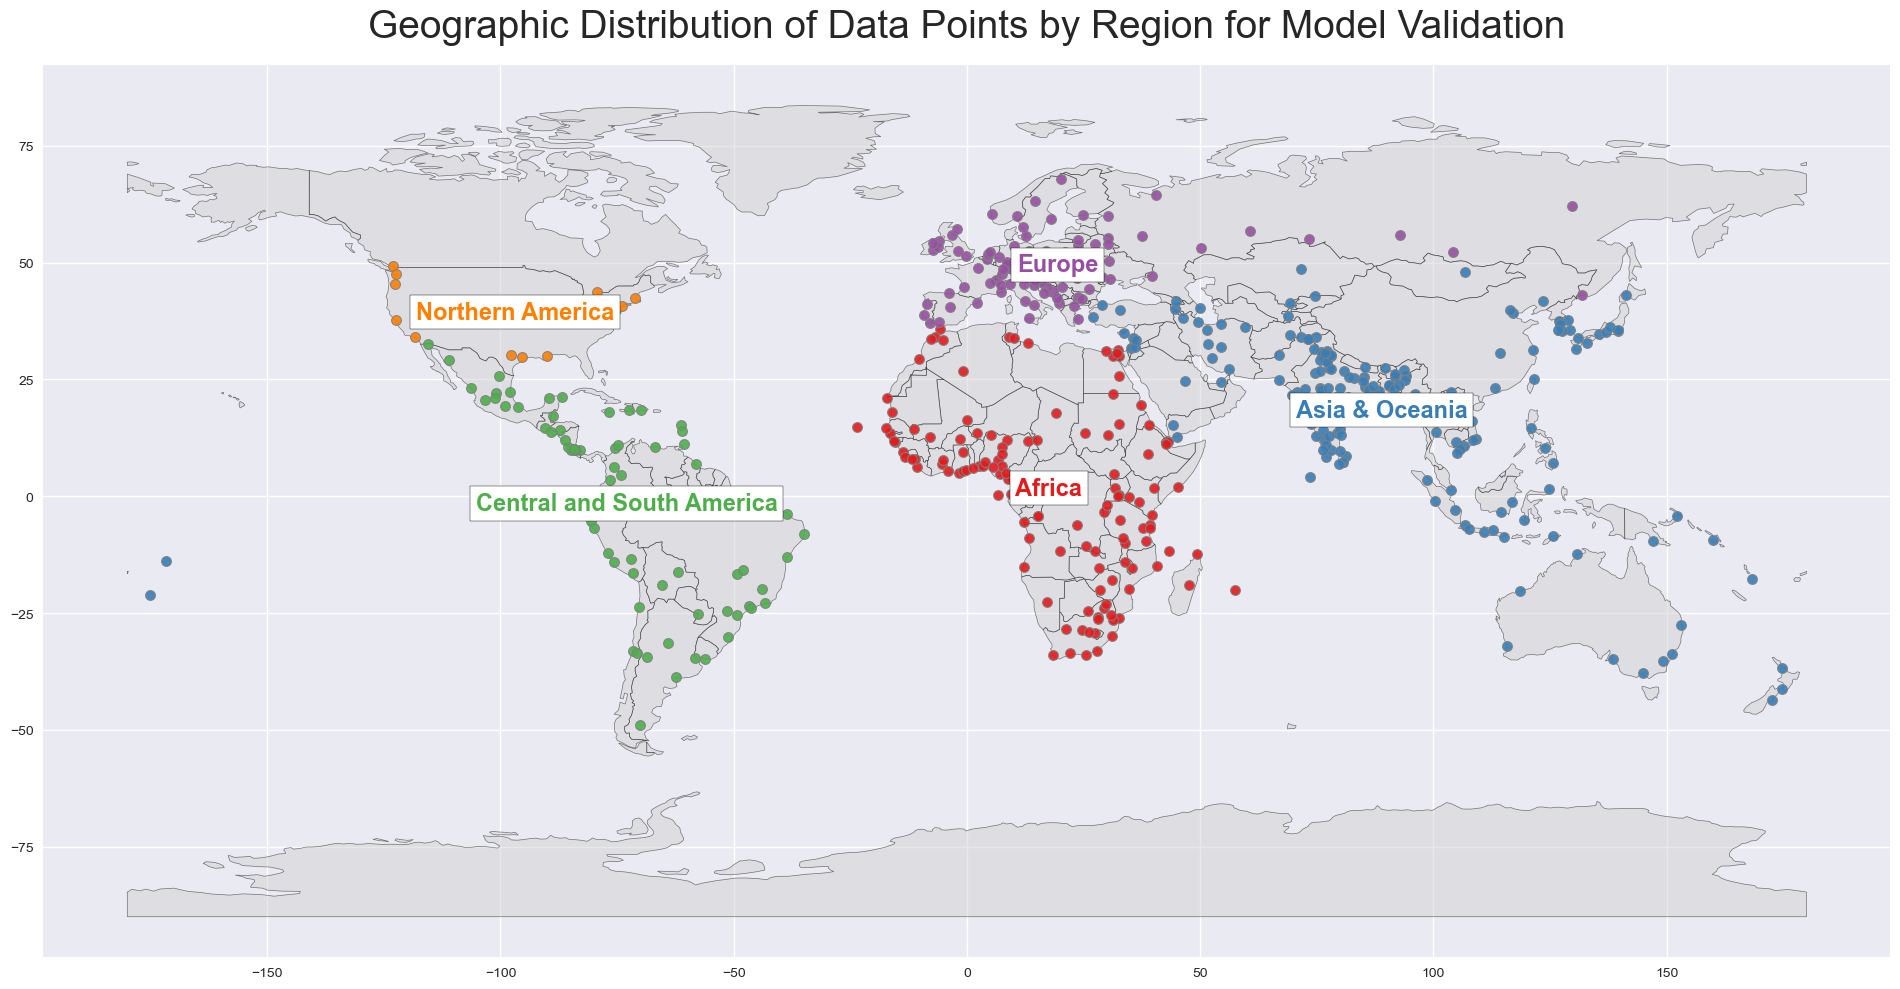

In [5]:

# Load world map data
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(30, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.5)

# Define the colors for regions
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', 
          '#FFFF33', '#A65628', '#F781BF', '#999999', '#66C2A5',
          '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F']

# Unique regions and color mapping
unique_regions = sorted(merged_df['Region Grouped'].unique())
color_dict = dict(zip(unique_regions, colors[:len(unique_regions)]))

# Plot the points for each region
for region in unique_regions:
    mask = merged_df['Region Grouped'] == region
    ax.scatter(merged_df[mask]['longitude'], 
               merged_df[mask]['latitude'],
               c=[color_dict[region]],
               label=region,
               alpha=0.9,  # Adjust alpha for visibility
               s=50,  # Set size to match previous plot
               edgecolor='gray',  # Set border color to gray for the points
               linewidth=0.8)  # Set border width
    
    # Add region labels
    mean_longitude = merged_df[mask]['longitude'].mean()
    mean_latitude = merged_df[mask]['latitude'].mean()
    
    ax.text(mean_longitude, mean_latitude, region, 
            fontsize=17, color=color_dict[region], 
            ha='center', va='center', weight='bold',
            bbox=dict(facecolor='white', alpha=1))

# Set plot title
ax.set_title('Geographic Distribution of Data Points by Region for Model Validation', fontsize=28, pad=20)
plt.tight_layout()

# Save the plot as a PNG file
fig.savefig('../figures/region_map.png', dpi=300, bbox_inches='tight') 
plt.show()


/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_9578/3961416930.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_9578/3961416930.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


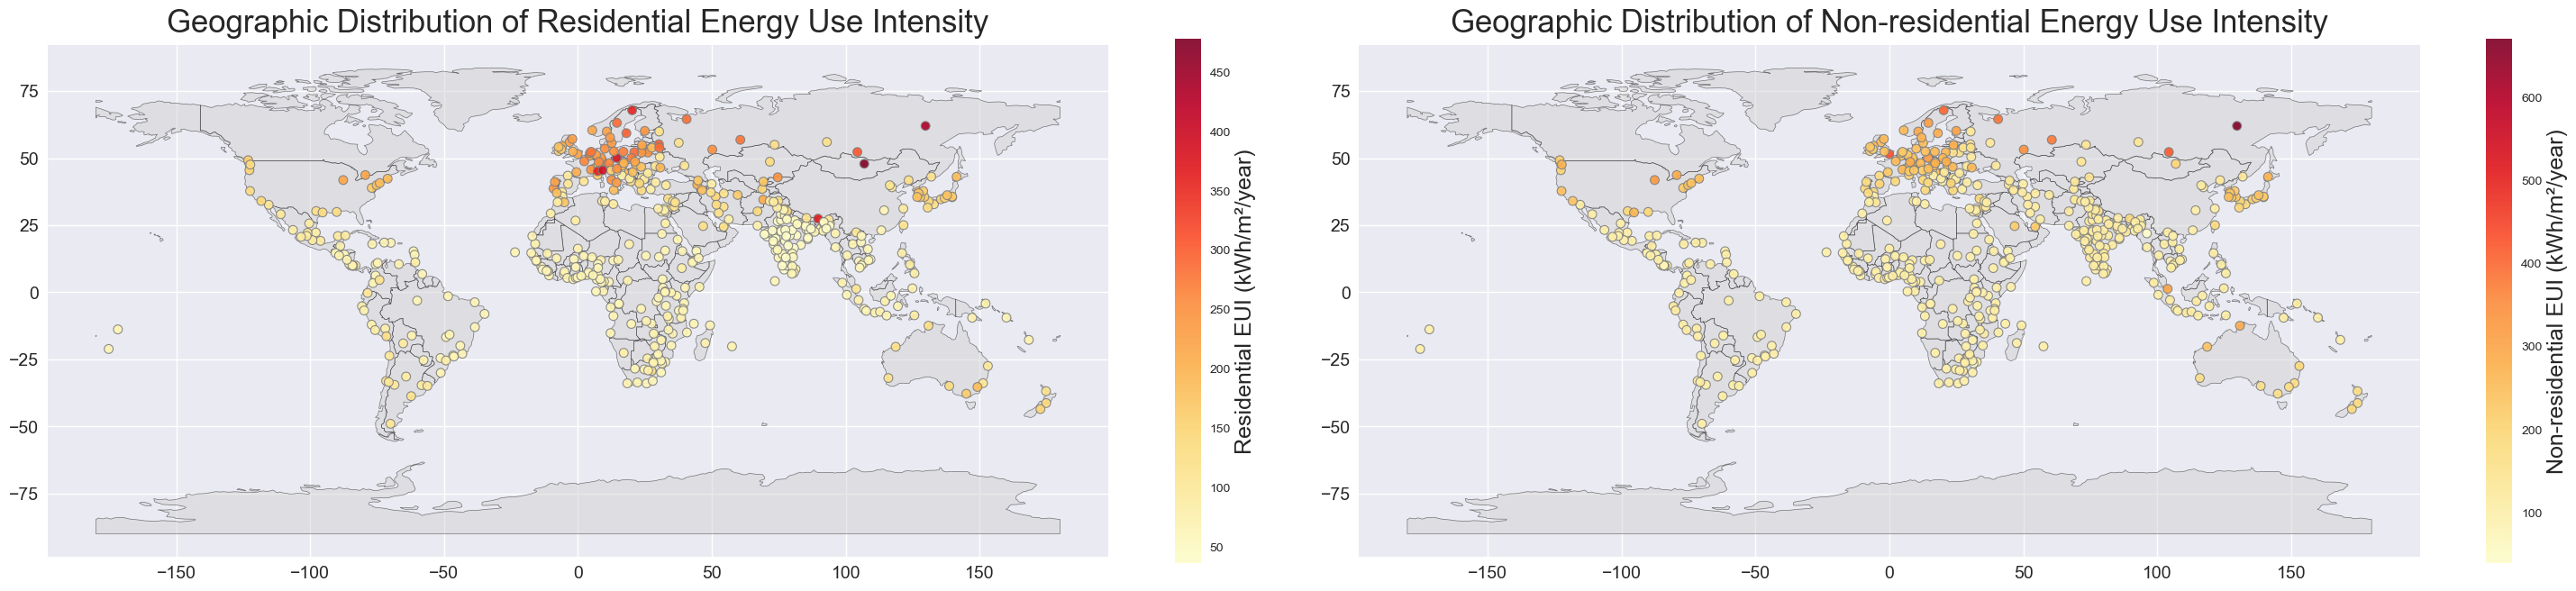

In [6]:
# Read the merged data and geographical features
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set up the plot style and figure
plt.style.use('seaborn')
fig, axes = plt.subplots(1, 2, figsize=(30, 10))  # Create two plots side by side

# Colormap and normalization for both plots
cmap = plt.cm.YlOrRd
norm_res = mcolors.Normalize(vmin=merged_df['Residential EUI (kWh/m2/year)'].min(),
                             vmax=merged_df['Residential EUI (kWh/m2/year)'].max())
norm_nonres = mcolors.Normalize(vmin=merged_df['Non-residential EUI (kWh/m2/year)'].min(),
                                vmax=merged_df['Non-residential EUI (kWh/m2/year)'].max())

# Plot 1: Residential EUI
ax1 = axes[0]
world.plot(ax=ax1, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.5)
sc1 = ax1.scatter(merged_df['longitude'], 
                  merged_df['latitude'], 
                  c=merged_df['Residential EUI (kWh/m2/year)'], 
                  cmap=cmap, 
                  norm=norm_res, 
                  alpha=0.9, 
                  s=50, 
                  edgecolor='gray', 
                  linewidth=0.8)
cbar1 = fig.colorbar(sc1, ax=ax1, orientation='vertical', shrink=0.6)
cbar1.set_label('Residential EUI (kWh/m²/year)', fontsize=18)  # Increased fontsize for colorbar label
ax1.set_title('Geographic Distribution of Residential Energy Use Intensity', fontsize=25, pad=10)  # Increased fontsize for title
ax1.tick_params(axis='both', which='major', labelsize=14)  # Increased fontsize for tick labels

# Plot 2: Non-residential EUI
ax2 = axes[1]
world.plot(ax=ax2, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.5)
sc2 = ax2.scatter(merged_df['longitude'], 
                  merged_df['latitude'], 
                  c=merged_df['Non-residential EUI (kWh/m2/year)'], 
                  cmap=cmap, 
                  norm=norm_nonres, 
                  alpha=0.9, 
                  s=50, 
                  edgecolor='gray', 
                  linewidth=0.8)
cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical', shrink=0.6)
cbar2.set_label('Non-residential EUI (kWh/m²/year)', fontsize=18)  # Increased fontsize for colorbar label
ax2.set_title('Geographic Distribution of Non-residential Energy Use Intensity', fontsize=25, pad=10)  # Increased fontsize for title
ax2.tick_params(axis='both', which='major', labelsize=14)  # Increased fontsize for tick labels

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
fig.savefig('../figures/eui_map.png', dpi=300, bbox_inches='tight')
plt.show()
